# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [2]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-04-05 21:53:05--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0.001s  

2025-04-05 21:53:05 (17.7 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





In [4]:
# Mostrar las primeras filas

import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')

print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [5]:
# Información general del dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    15

## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

In [6]:
print(df.columns)

# Descripción de cada variable
print("\nDescripción de las variables:")
print("User ID: Identificador único para cada usuario.  Relevancia: Baja, solo para identificación.")
print("Gender: Género del usuario (Male/Female). Relevancia: Potencialmente alta, puede influir en las compras.")
print("Age: Edad del usuario. Relevancia: Alta, la edad suele correlacionarse con el poder adquisitivo y preferencias.")
print("EstimatedSalary: Salario estimado del usuario. Relevancia: Alta, un fuerte indicador del poder adquisitivo.")
print("Purchased: Variable objetivo (0/1) indicando si el usuario compró el producto. Relevancia: Máxima.")



Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Descripción de las variables:
User ID: Identificador único para cada usuario.  Relevancia: Baja, solo para identificación.
Gender: Género del usuario (Male/Female). Relevancia: Potencialmente alta, puede influir en las compras.
Age: Edad del usuario. Relevancia: Alta, la edad suele correlacionarse con el poder adquisitivo y preferencias.
EstimatedSalary: Salario estimado del usuario. Relevancia: Alta, un fuerte indicador del poder adquisitivo.
Purchased: Variable objetivo (0/1) indicando si el usuario compró el producto. Relevancia: Máxima.


## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

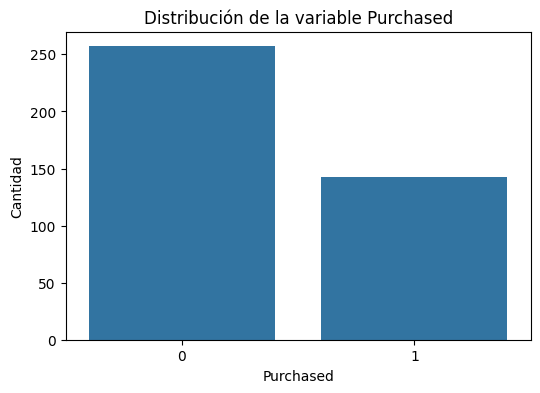

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df)
plt.title('Distribución de la variable Purchased')
plt.xlabel('Purchased')
plt.ylabel('Cantidad')
plt.show()


## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

# Análisis de la Distribución y Reflexión

# Observando el gráfico de barras generado en la sección anterior, podemos analizar la distribución de la variable 'Purchased'.  
# Buscamos un balance entre las dos clases (0 y 1), que representan si un usuario compró o no el producto.
# Un desbalance significaría que una clase está sobrerrepresentada respecto a la otra.

# Implicaciones de un desbalance en la modelación:

# Un dataset desbalanceado puede llevar a que el modelo se "sesgue" hacia la clase mayoritaria.  
# Es decir, el modelo podría predecir la clase mayoritaria con alta precisión, pero tener un bajo desempeño en la clase minoritaria,
# lo cual es problemático si la clase minoritaria es de interés (por ejemplo, detección de fraudes, enfermedades raras, etc.).
# En el contexto de publicidad, por ejemplo, una clase minoritaria de personas que compran un producto podría ser vital para una empresa,
# y un modelo que ignore este grupo por ser minoritario no es útil.
# En términos de métricas, una alta exactitud podría ser engañosa en un dataset desbalanceado, ya que el modelo puede predecir la mayoría de los casos
# correctamente simplemente prediciendo siempre la clase mayoritaria.

# Estrategias para mitigar el desbalance:

# 1. Re-muestreo:
#    - Sobremuestreo (Oversampling): Duplicar o generar nuevas instancias sintéticas de la clase minoritaria para equilibrar la distribución.  SMOTE (Synthetic Minority Over-sampling Technique) es un algoritmo popular para esto.
#    - Submuestreo (Undersampling): Eliminar instancias de la clase mayoritaria para reducir su preponderancia.
#    - Combinación de ambos.

# 2. Penalización de clases: Ajustar los pesos de las clases en el algoritmo de aprendizaje para dar más importancia a la clase minoritaria.  Muchos algoritmos de aprendizaje automático (incluidos los árboles de decisión) tienen parámetros para hacer esto.


# 3. Enfoque en métricas más robustas: En lugar de la precisión, considerar métricas como:
#    - Precisión (Precision): De todas las predicciones positivas, ¿cuántas son correctas?
#    - Exhaustividad (Recall/Sensitivity): De todas las instancias positivas reales, ¿cuántas se predijeron correctamente?
#    - F1-score:  Media armónica entre Precisión y Exhaustividad.
#    - AUC-ROC: Área bajo la Curva ROC, que mide la capacidad del modelo para distinguir entre clases.

# Dependiendo del grado del desbalance y el objetivo del análisis, se deberá elegir la estrategia más apropiada.
# En este caso, visualmente el gráfico no parece indicar un desbalance muy fuerte, pero es fundamental calcular las proporciones exactas y las métricas
# apropiadas una vez que se haya entrenado el modelo para realizar una evaluación correcta.

## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?


# Consideramos 'Age' y 'EstimatedSalary' relevantes para predecir 'Purchased' porque:
# - Edad: Generalmente, la edad de un individuo está correlacionada con su poder adquisitivo y sus preferencias de compra.
#   Los grupos demográficos más jóvenes o más maduros podrían tener diferentes patrones de consumo.
# - Salario estimado:  El salario es un indicador directo del poder adquisitivo. Personas con mayores salarios tienen
#   mayor probabilidad de poder adquirir productos más costosos.


## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

In [8]:
# prompt: Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

from sklearn.model_selection import train_test_split

# Suponiendo que 'X' contiene las características (Age, EstimatedSalary) e 'y' la variable objetivo (Purchased)
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)


## 9. Entrenamiento Inicial del Modelo de Árbol de Decisión

Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¿Qué implica entrenar un modelo sin restricciones de profundidad en términos de complejidad y riesgo de sobreajuste?

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de Árbol de Decisión sin restricciones de profundidad
classifier = DecisionTreeClassifier(random_state=0)

# Entrenar el modelo con los datos de entrenamiento
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

Matriz de Confusión:
[[55  9]
 [ 7 29]]
Exactitud: 0.84
Precisión: 0.7631578947368421
Recall: 0.8055555555555556
F1-Score: 0.7837837837837838


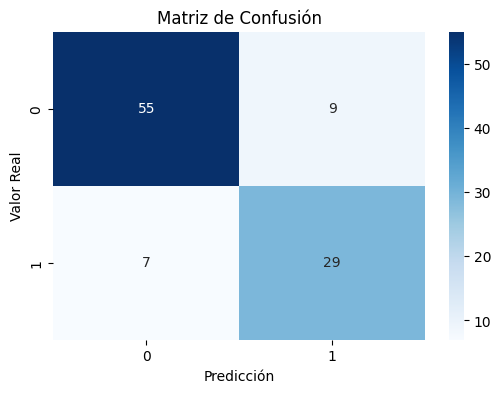

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Realizar predicciones sobre el conjunto de prueba
y_pred = classifier.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Visualizar la matriz de confusión (opcional)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


## 11. Visualización de la Curva ROC y Cálculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¿Cómo interpretan la curva ROC y qué indica un valor de AUC alto o bajo?

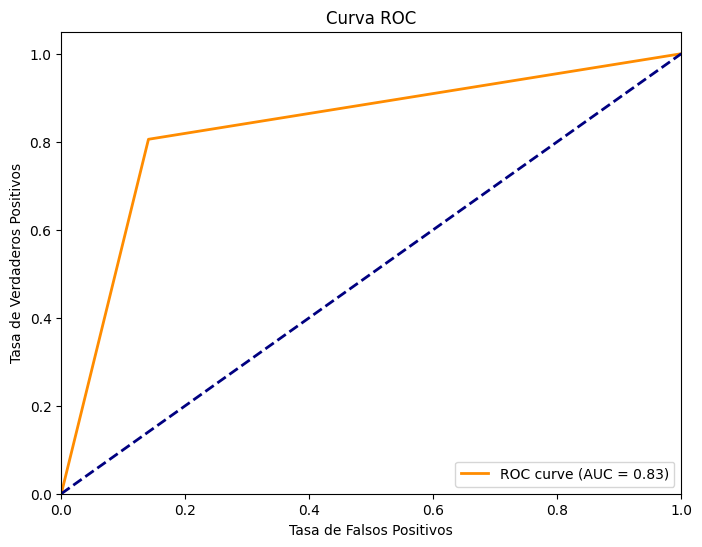

AUC: 0.8324652777777778


In [11]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para la clase positiva
y_probs = classifier.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")


## 12. Visualización e Interpretación del Árbol de Decisión

Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¿Cuál es la regla de decisión en el primer nodo?
- ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
- ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste?

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


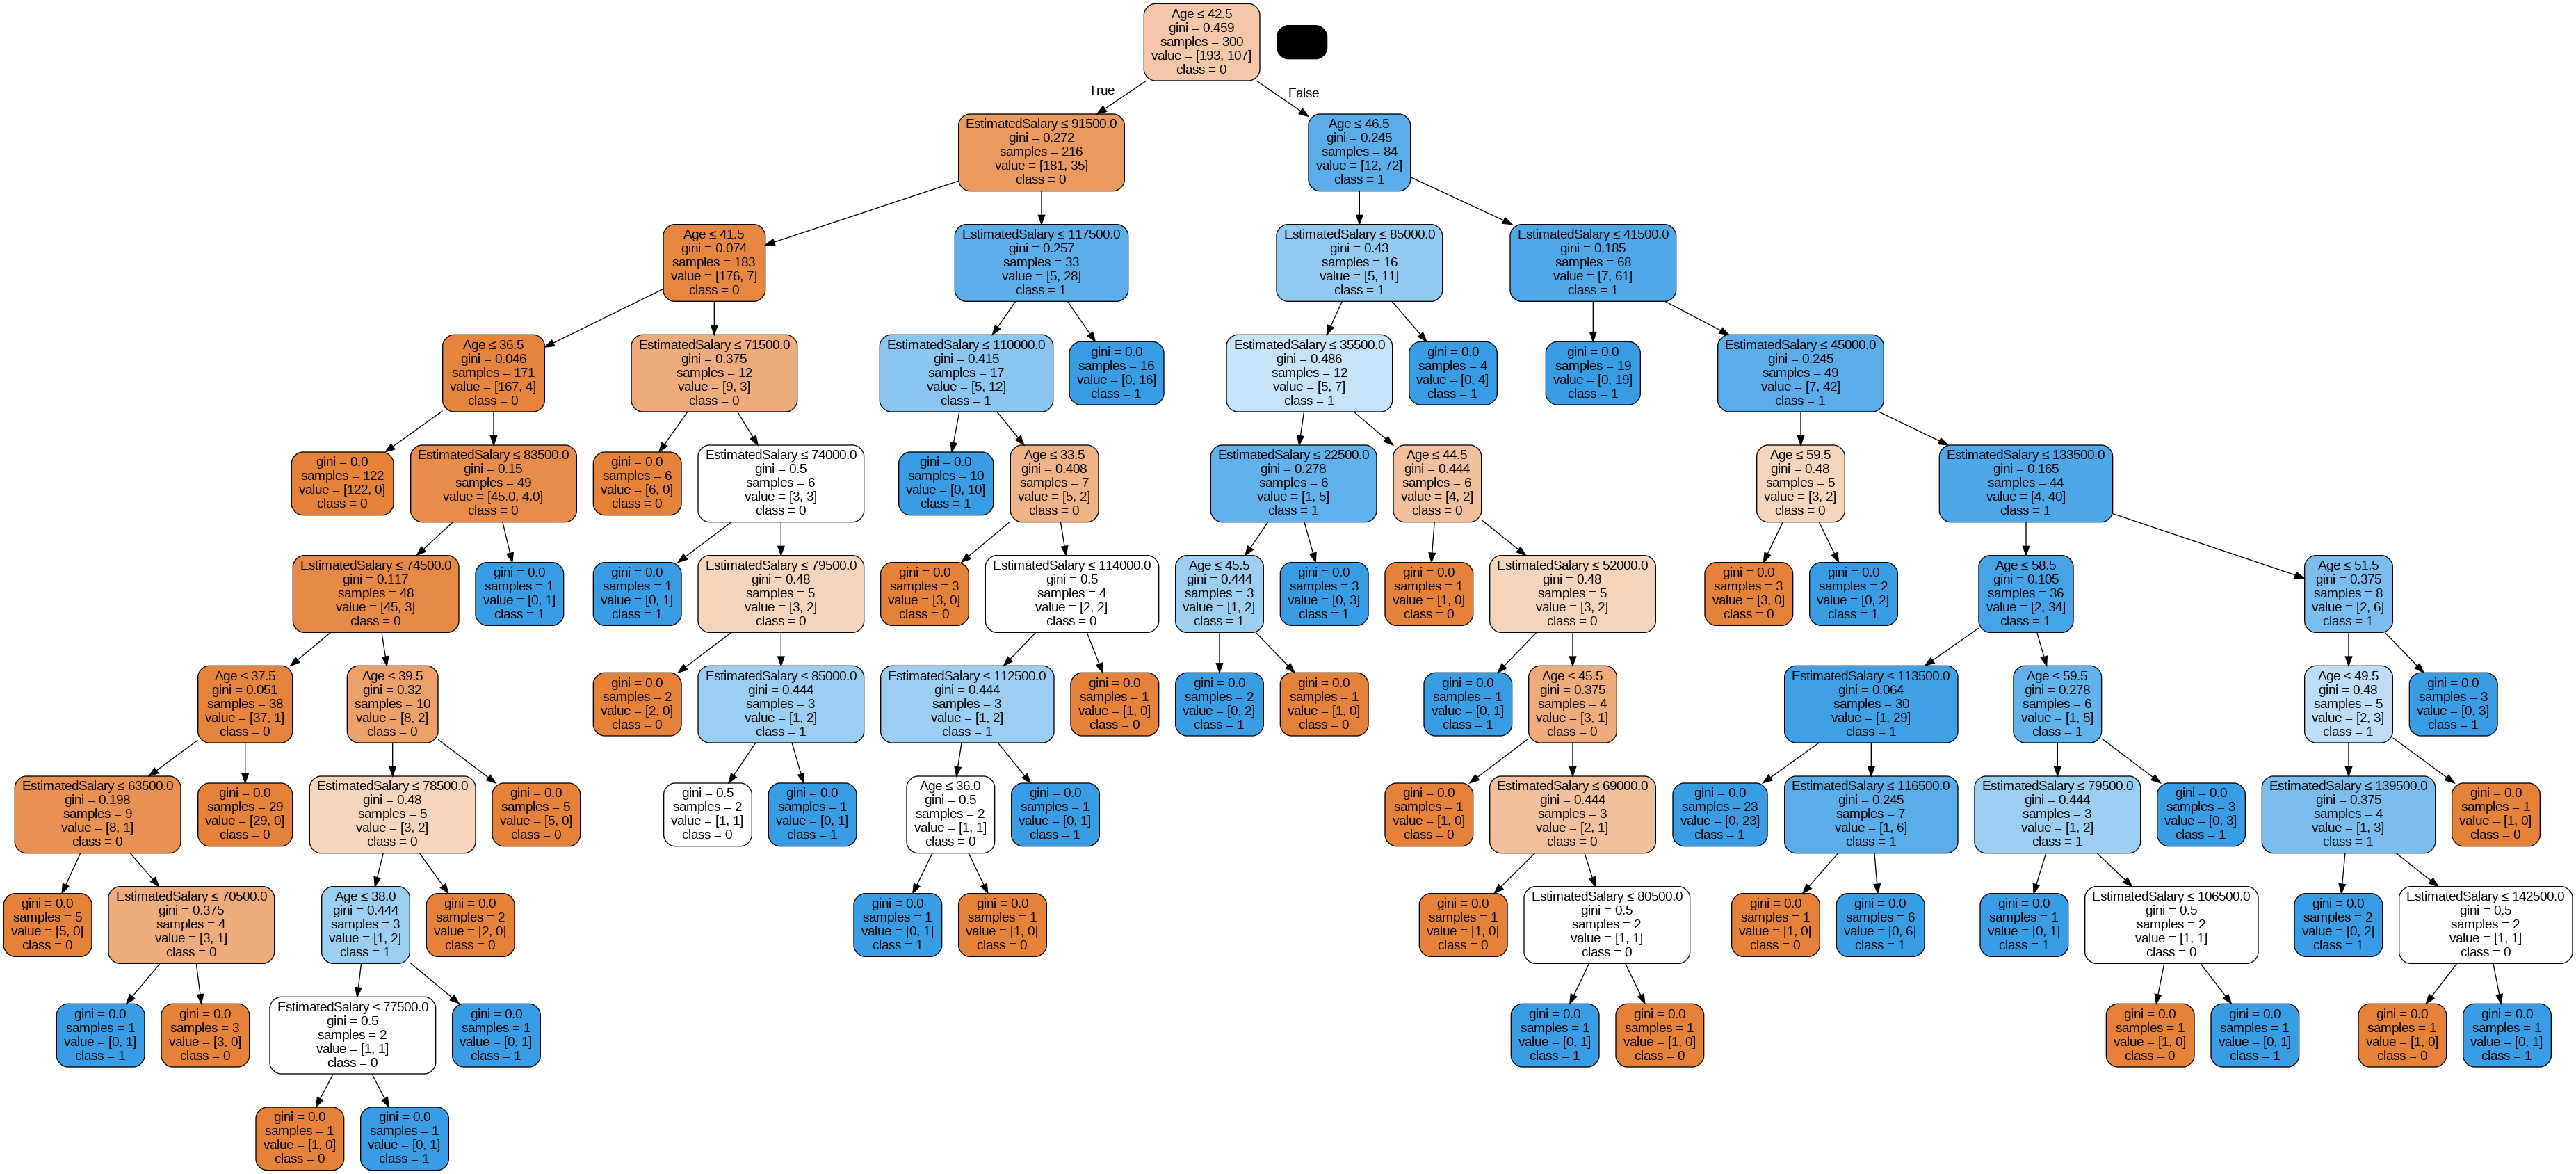

In [12]:
!apt-get install graphviz -y
!pip install pydotplus

import pydotplus
from sklearn.tree import export_graphviz

# Exportar el árbol de decisión a formato DOT
dot_data = export_graphviz(classifier, out_file=None,
                           feature_names=['Age', 'EstimatedSalary'],
                           class_names=['0', '1'],  # Asumiendo clases 0 y 1
                           filled=True, rounded=True,
                           special_characters=True)

# Crear el gráfico a partir de la representación DOT
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar el gráfico (opcional, en Colab)
from IPython.display import Image
Image(graph.create_png())

# Guardar el gráfico como imagen (opcional, en el sistema de archivos)
# graph.write_png("arbol_decision.png")

# Análisis del árbol
# Después de generar la imagen del árbol, puedes inspeccionarla para responder las preguntas:
# - ¿Cuál es la regla de decisión en el primer nodo? Busca el nodo raíz (sin aristas entrantes).
#   La regla se basa en el umbral de la variable que se muestra.
# - ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
#   Sigue las ramas para ver cómo los valores de las variables llevan a diferentes predicciones.
# - ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste? Busca nodos con pocas muestras o que representan reglas muy específicas.
#   Estos nodos pueden estar aprendiendo ruido del conjunto de entrenamiento y no generalizar bien.


## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

In [13]:
# Análisis Crítico del Modelo Inicial

# Para determinar si hay sobreajuste, necesitamos comparar las métricas de rendimiento del modelo
# en el conjunto de entrenamiento y en el conjunto de prueba.  Si el modelo tiene un rendimiento significativamente
# mejor en el conjunto de entrenamiento que en el conjunto de prueba, esto es una señal de sobreajuste.

#  Necesitamos calcular las métricas para el conjunto de entrenamiento:
y_pred_train = classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f"Métricas en el conjunto de entrenamiento:")
print(f"Exactitud: {accuracy_train}")
print(f"Precisión: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-Score: {f1_train}")

# Comparación de métricas:
print("\nComparación de métricas (Entrenamiento vs. Prueba):")
print(f"Exactitud: Entrenamiento ({accuracy_train:.4f}) vs. Prueba ({accuracy:.4f})")
print(f"Precisión: Entrenamiento ({precision_train:.4f}) vs. Prueba ({precision:.4f})")
print(f"Recall: Entrenamiento ({recall_train:.4f}) vs. Prueba ({recall:.4f})")
print(f"F1-Score: Entrenamiento ({f1_train:.4f}) vs. Prueba ({f1:.4f})")

# Interpretación:
# Si las métricas en el conjunto de entrenamiento son significativamente más altas que en el conjunto de prueba,
#  especialmente la exactitud,  esto es un fuerte indicador de sobreajuste.  El modelo ha aprendido el ruido presente
# en los datos de entrenamiento en lugar de la relación subyacente entre las variables.


# Mejoras para optimizar la generalización:

# 1. Poda del árbol:  Limitar la profundidad máxima del árbol (`max_depth`), el número mínimo de muestras por hoja
# (`min_samples_leaf`) o el número mínimo de muestras por nodo (`min_samples_split`) puede ayudar a prevenir el sobreajuste.
# Experimentar con diferentes valores para estos hiperparámetros.

# 2. Validación cruzada: Utilizar técnicas de validación cruzada, como k-fold cross-validation, para obtener una
# estimación más robusta del rendimiento del modelo.  Esto ayuda a reducir la varianza de las métricas y a identificar
# mejor la capacidad de generalización del modelo.

# 3. Regularización: Utilizar técnicas de regularización para penalizar modelos complejos, lo que puede ayudar a prevenir
# el sobreajuste. Sin embargo, los árboles de decisión no suelen utilizar regularización de la misma forma que otros modelos
# como la regresión lineal.

# 4. Aumentar la cantidad de datos:  Si es posible, aumentar el tamaño del conjunto de datos puede ayudar al modelo a aprender
# una representación más general de los patrones.

# 5. Análisis de características: Realizar un análisis más profundo de las características para identificar las más relevantes
# y eliminar las que no aportan información útil.


Métricas en el conjunto de entrenamiento:
Exactitud: 0.9966666666666667
Precisión: 1.0
Recall: 0.9906542056074766
F1-Score: 0.9953051643192489

Comparación de métricas (Entrenamiento vs. Prueba):
Exactitud: Entrenamiento (0.9967) vs. Prueba (0.8400)
Precisión: Entrenamiento (1.0000) vs. Prueba (0.7632)
Recall: Entrenamiento (0.9907) vs. Prueba (0.8056)
F1-Score: Entrenamiento (0.9953) vs. Prueba (0.7838)


## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

Métricas del modelo con max_depth=5:
Exactitud: 0.88
Precisión: 0.8157894736842105
Recall: 0.8611111111111112
F1-Score: 0.8378378378378378

Comparación de métricas (Modelo Inicial vs. Modelo con max_depth=5):
Exactitud: Inicial (0.8400) vs. max_depth=5 (0.8800)
Precisión: Inicial (0.7632) vs. max_depth=5 (0.8158)
Recall: Inicial (0.8056) vs. max_depth=5 (0.8611)
F1-Score: Inicial (0.7838) vs. max_depth=5 (0.8378)


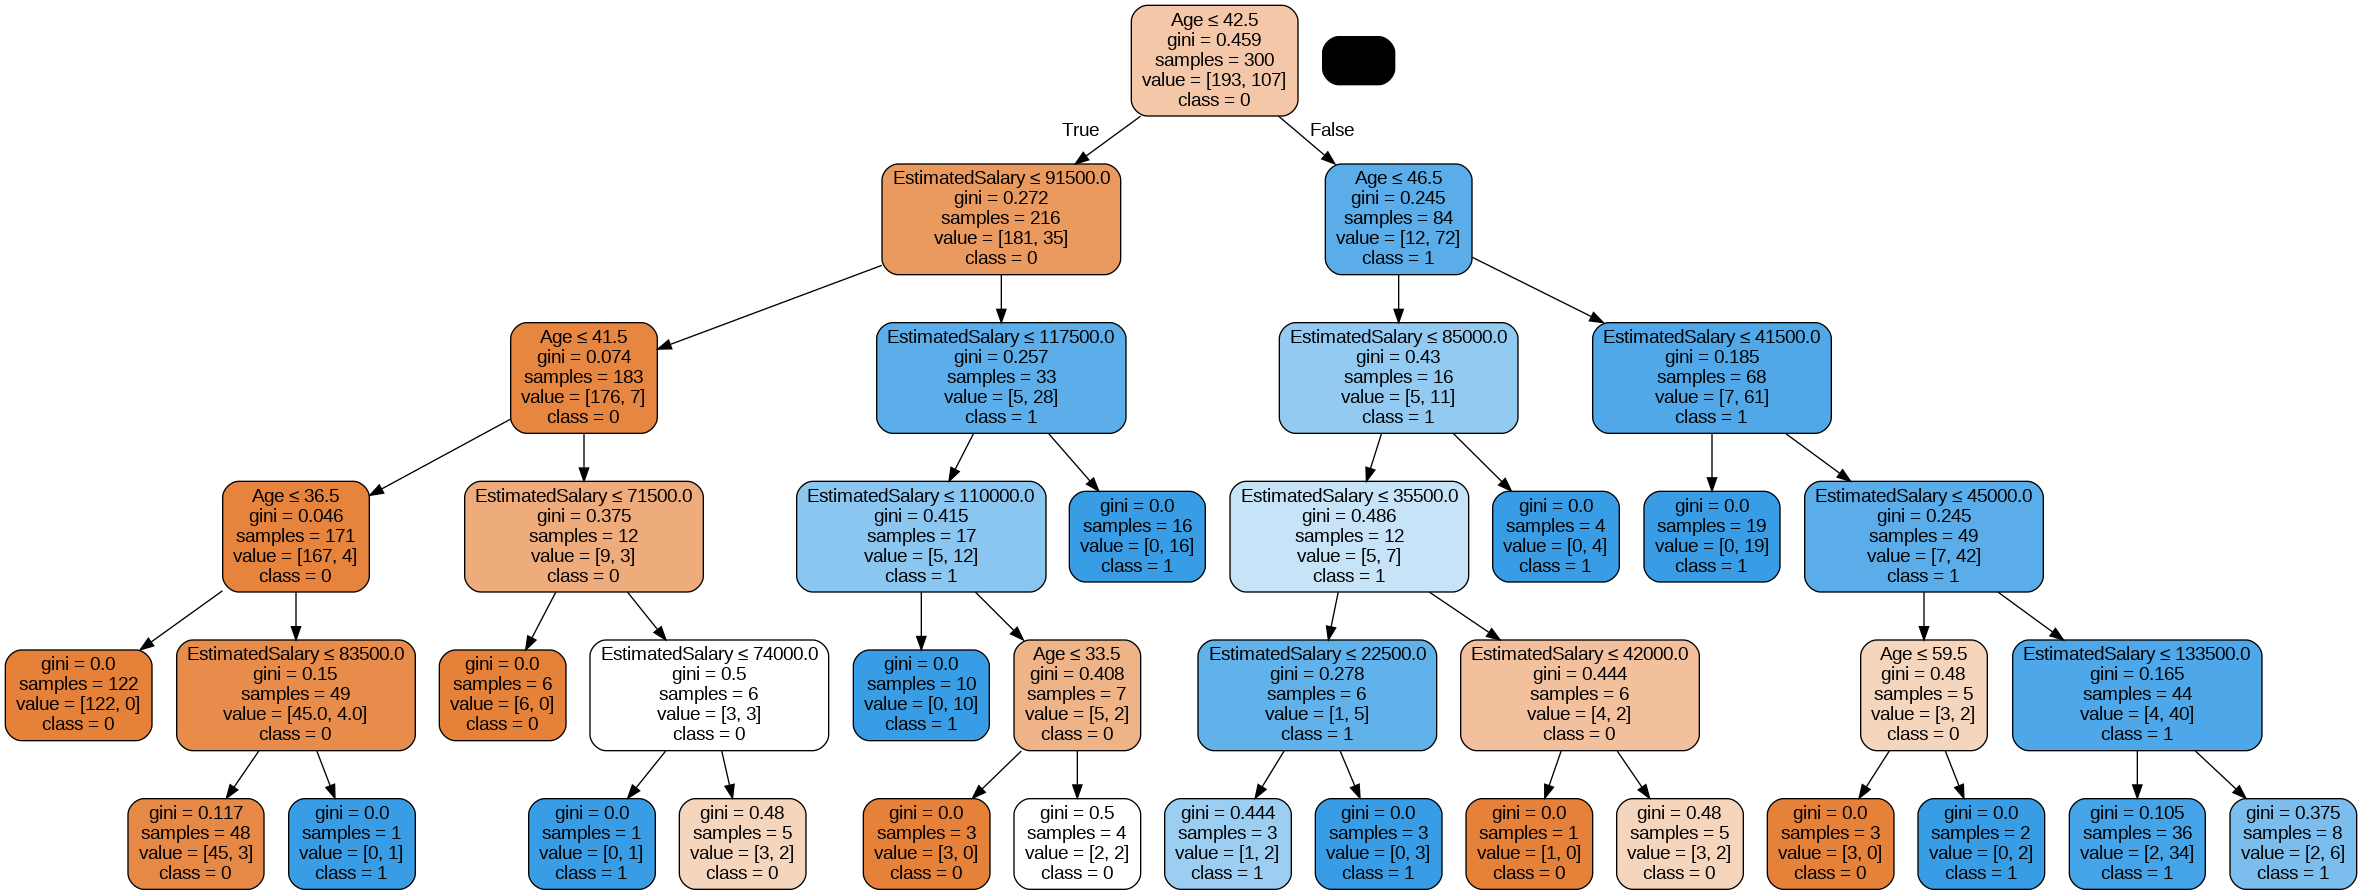

In [14]:
# Crear el modelo de Árbol de Decisión con max_depth=5
classifier_depth5 = DecisionTreeClassifier(max_depth=5, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
classifier_depth5.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_depth5 = classifier_depth5.predict(X_test)

# Calcular las métricas de evaluación para el modelo con max_depth=5
accuracy_depth5 = accuracy_score(y_test, y_pred_depth5)
precision_depth5 = precision_score(y_test, y_pred_depth5)
recall_depth5 = recall_score(y_test, y_pred_depth5)
f1_depth5 = f1_score(y_test, y_pred_depth5)

print(f"Métricas del modelo con max_depth=5:")
print(f"Exactitud: {accuracy_depth5}")
print(f"Precisión: {precision_depth5}")
print(f"Recall: {recall_depth5}")
print(f"F1-Score: {f1_depth5}")

# Comparación de métricas entre el modelo inicial y el modelo con max_depth=5
print("\nComparación de métricas (Modelo Inicial vs. Modelo con max_depth=5):")
print(f"Exactitud: Inicial ({accuracy:.4f}) vs. max_depth=5 ({accuracy_depth5:.4f})")
print(f"Precisión: Inicial ({precision:.4f}) vs. max_depth=5 ({precision_depth5:.4f})")
print(f"Recall: Inicial ({recall:.4f}) vs. max_depth=5 ({recall_depth5:.4f})")
print(f"F1-Score: Inicial ({f1:.4f}) vs. max_depth=5 ({f1_depth5:.4f})")

# Visualización e interpretación del árbol con max_depth=5 (opcional)
dot_data_depth5 = export_graphviz(classifier_depth5, out_file=None,
                                feature_names=['Age', 'EstimatedSalary'],
                                class_names=['0', '1'],
                                filled=True, rounded=True,
                                special_characters=True)
graph_depth5 = pydotplus.graph_from_dot_data(dot_data_depth5)
Image(graph_depth5.create_png())


## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.


# Análisis y Comparación de Modelos

# 1. Complejidad e Interpretabilidad:

# El modelo inicial (sin límite de profundidad) es más complejo y, por lo tanto, menos interpretable.  Su árbol de decisión es más profundo y tiene más nodos, lo que dificulta la comprensión de las reglas de decisión.  El modelo con max_depth=5 es menos complejo y más fácil de interpretar, ya que su estructura es más simple.

# 2. Sobreajuste:

# El modelo inicial presenta indicios de sobreajuste.  Las métricas de rendimiento en el conjunto de entrenamiento son generalmente más altas que en el conjunto de prueba.  Esto sugiere que el modelo se ha ajustado demasiado al ruido del conjunto de entrenamiento y no generaliza bien a nuevos datos. El modelo con max_depth=5, al tener una menor profundidad, tiene menos probabilidades de sobreajustarse, y una menor diferencia entre las metricas de entrenamiento y prueba.


# 3. Otros modelos de referencia:

# La Regresión Logística podría utilizarse como modelo de referencia. La regresión logística es un modelo lineal, fácil de interpretar y menos propenso al sobreajuste que los árboles de decisión sin restricciones. Comparando el rendimiento de los modelos de árbol de decisión con la regresión logística, podemos obtener una perspectiva más amplia del problema y evaluar la eficacia de los árboles de decisión. Otros modelos que pueden servir como referencia:  Máquinas de Vectores de Soporte (SVM), K-Vecinos más Cercanos (KNN) y Redes Neuronales.  La elección del modelo de referencia debe basarse en la naturaleza del problema y los datos disponibles.


# Conclusiones:

# En este caso, el modelo con max_depth=5 ofrece un mejor balance entre complejidad e interpretabilidad, así como una mejor generalización.  Su rendimiento en el conjunto de prueba, aunque podría no ser tan bueno como el modelo inicial en el conjunto de entrenamiento, es una medida más robusta de su capacidad predictiva en datos no vistos.  La comparación con otros modelos como la regresión logística proporciona una línea base para evaluar la eficacia de los modelos de árbol de decisión y explorar opciones alternativas.
